# EDA: Journey Bike Data 

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates

In [36]:
journey_df = pd.read_csv('../data/interim/journey_data_cleaned.csv', parse_dates=['end_date', 'start_date'], index_col=0)

/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


# 1. Temporal Analysis

### 1.1 number of bike journeys per year

In [9]:
# Create a 'year' column
journey_df['year'] = journey_df['start_date'].dt.year

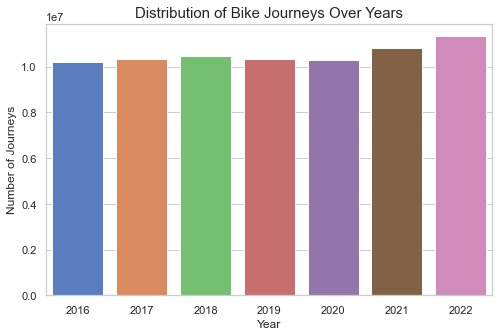

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Set the size of the figure
plt.figure(figsize=(8, 5))

# Generate the countplot
sns.countplot(x='year', data=journey_df, palette="deep")

# Set the title and labels, adding some font details and color
plt.title('Distribution of Bike Journeys Over Years', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Journeys', fontsize=12)

# Show the plot
plt.show()


### 1.2 Temporal Analysis

### 1.3 Impact of Covid restrictions

In [41]:
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

# Set the size of the figure
fig, axs = plt.subplots(5, 1, figsize=(14, 18))

# Create a 'date' column that contains only the date part of the 'start_time'
journey_df['date'] = journey_df['start_date'].dt.date

# Group by date and count the number of journeys
journeys_per_date = journey_df.groupby(['date']).size().reset_index(name='count')

# 1. Plot the original data
axs[0].plot(decomposed.observed, label='Original')
axs[0].legend(loc='upper left')
axs[0].set_title("Observed")

# 2. Plot the original data with lockdown periods
axs[1].plot(journeys_per_date['date'], journeys_per_date['count'], label='Original with lockdown periods')
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axs[1].xaxis.set_major_locator(mdates.YearLocator())
axs[1].axvspan('2020-03-23', '2020-07-03', color='orange', alpha=0.3, label='First National Lockdown')
axs[1].axvspan('2020-11-05', '2020-11-26', color='red', alpha=0.3, label='Second National Lockdown')
axs[1].axvspan('2021-01-06', '2021-03-08', color='purple', alpha=0.3, label='Third National Lockdown')
axs[1].legend()
axs[1].set_title('Observed with lockdown periods')


# 3. Plot the trend
axs[2].plot(decomposed.trend, label='Trend')
axs[2].legend(loc='upper left')
axs[2].set_title("Trend")

# 4. Plot the seasonality
axs[3].plot(decomposed.seasonal, label='Seasonality')
axs[3].legend(loc='upper left')
axs[3].set_title("Seasonality")

# 5. Plot the residuals
axs[4].plot(decomposed.resid, label='Residuals')
axs[4].legend(loc='upper left')
axs[4].set_title("Residuals")

plt.tight_layout()
plt.show()


# 2. Station Analysis

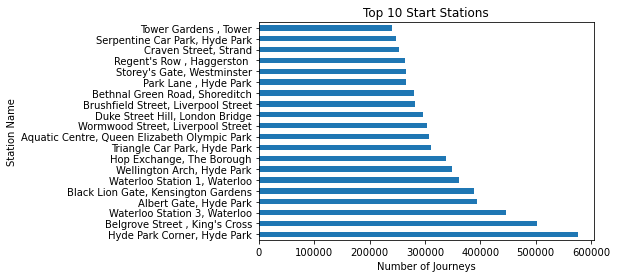

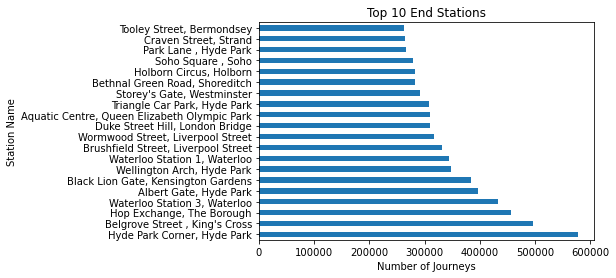

In [7]:
# Top start and end stations: to identify high-demand areas.
journey_df['start_station_name'].value_counts().head(20).plot(kind='barh')
plt.title('Top 10 Start Stations')
plt.xlabel('Number of Journeys')
plt.ylabel('Station Name')
plt.show()

journey_df['end_station_name'].value_counts().head(20).plot(kind='barh')
plt.title('Top 10 End Stations')
plt.xlabel('Number of Journeys')
plt.ylabel('Station Name')
plt.show()


In [ ]:
# Heatmap of correlations: This could help identify relationships between numerical variables.
import seaborn as sns

correlation_matrix = journey_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()